In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
trainset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv')

In [3]:
trainset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
testset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
print("Train Shape: ",trainset.shape)
print("Test Shape: ",testset.shape)

Train Shape:  (1460, 81)
Test Shape:  (1459, 80)


In [6]:
# Column ID is not required

ID_testset = pd.DataFrame()
ID_testset = testset['Id']
trainset = trainset.drop(columns='Id', axis=1)
testset = testset.drop(columns='Id', axis=1)

In [7]:
trainset.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

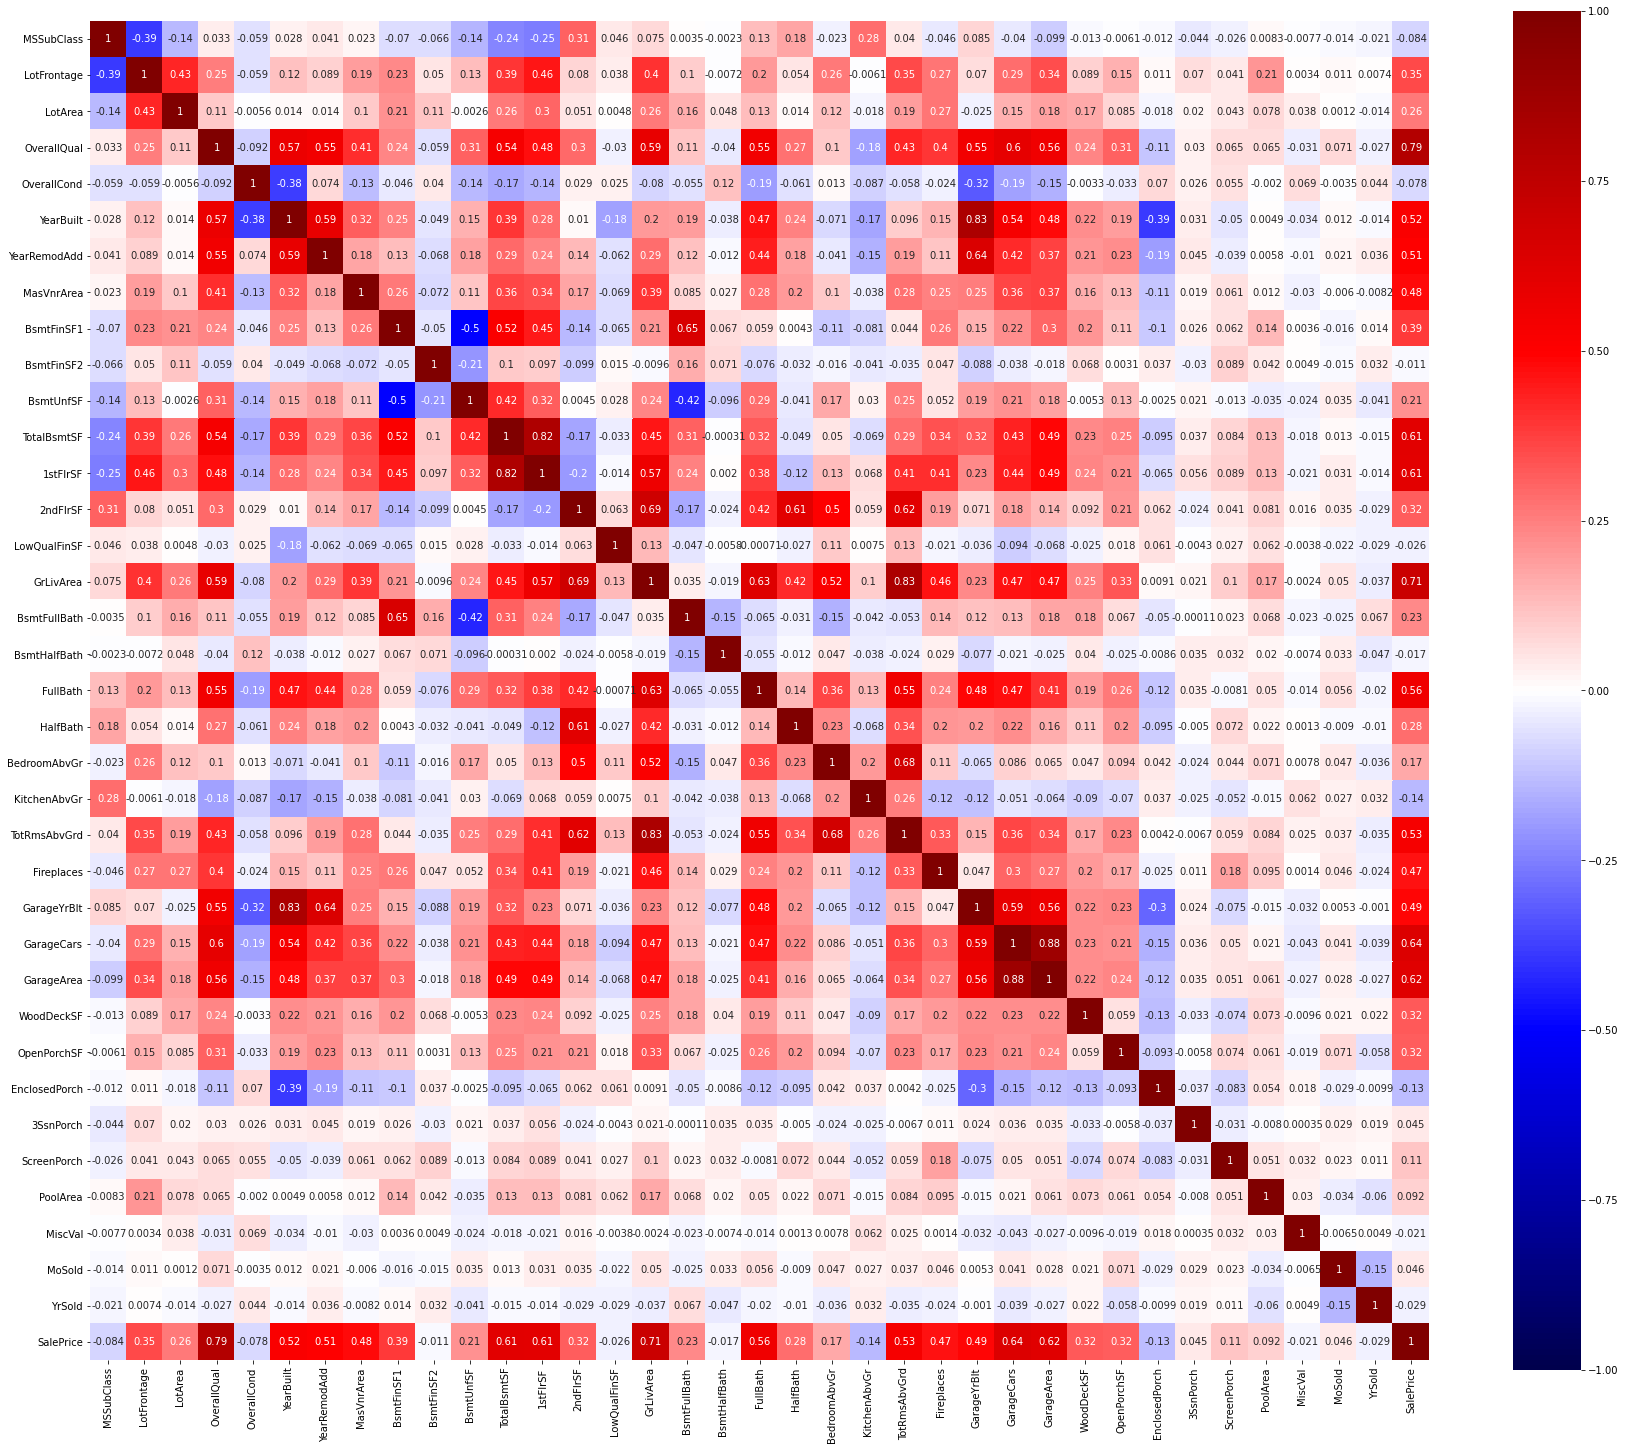

In [9]:
# pearson : standard correlation coefficient
# kendall : Kendall Tau correlation coefficient
# spearman : Spearman rank correlation

plt.subplots(figsize=(30,25))
sns.heatmap(trainset.corr(),cmap='seismic', annot=True, vmax=1, vmin=-1, square=True)
plt.show()

# plt.savefig("TrainSetMethPerson.png")

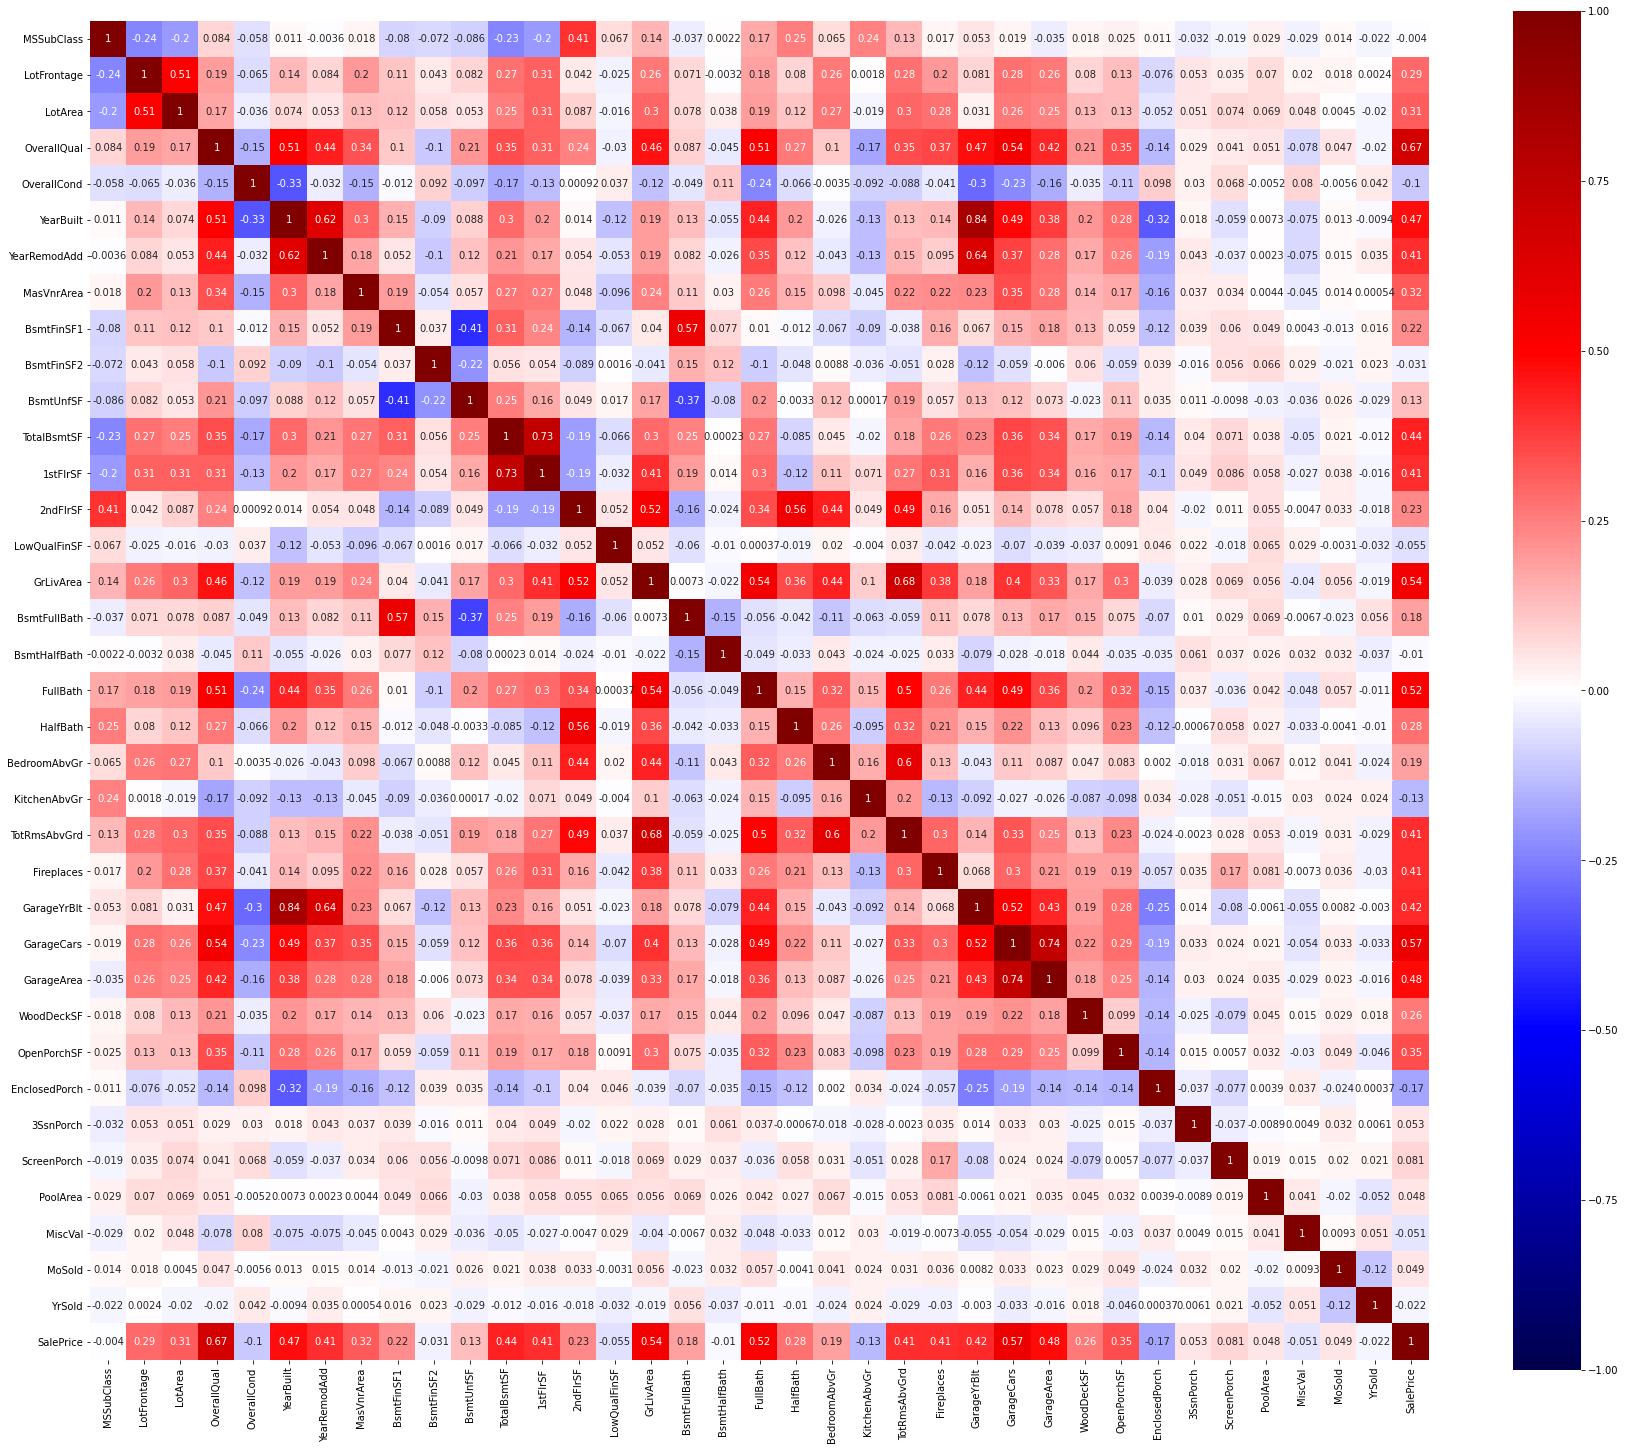

In [10]:
plt.subplots(figsize=(30,25))
sns.heatmap(trainset.corr(method='kendall'),cmap='seismic', annot=True, vmax=1, vmin=-1, square=True)
plt.show()

# plt.savefig("TrainSetMethKendall.png")

Skewness:  1.8828757597682129


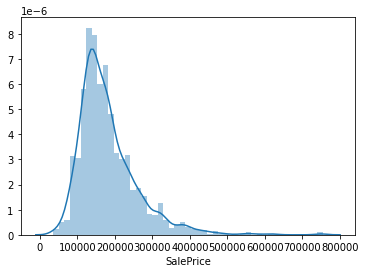

In [11]:
#skewness = 0 : normally distributed.
#skewness > 0 : more weight in the left tail of the distribution.
#skewness < 0 : more weight in the right tail of the distribution. 
print('Skewness: ',trainset['SalePrice'].skew())

sns.distplot(trainset['SalePrice'])

Skewness:  0.12133506220520406


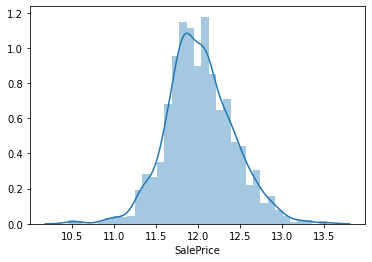

In [12]:
# We can visualize the skewness, and we got to remove this for improve our machine learning

SalePriceReal = pd.DataFrame()
SalePriceReal = trainset['SalePrice']
trainset['SalePrice'] = np.log(trainset['SalePrice'])
sns.distplot(trainset['SalePrice'])
print('Skewness: ',trainset['SalePrice'].skew())

In [13]:
totalisnull = trainset.isnull().sum().sort_values(ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(totalisnull)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageType         81
GarageCond         81
GarageFinish       81
GarageQual         81
GarageYrBlt        81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
RoofMatl            0
Exterior1st         0
RoofStyle           0
ExterQual           0
Exterior2nd         0
YearBuilt           0
ExterCond           0
Foundation          0
YearRemodAdd        0
SalePrice           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
LotConfig           0
Utilities           0
LandContour         0
LotShape            0
Street              0
LotArea             0
MSZoning            0
BsmtFinSF1          0
HeatingQC 

In [14]:
# Drop columns that have many Null values

trainset = trainset.drop((totalisnull[totalisnull >5].index), axis=1)
testset = testset.drop((totalisnull[totalisnull >5].index), axis=1)
trainset.isnull().sum().max()

1

In [15]:
def HandlingMissingValues(dataset):
    columnHasMissingValues = dataset.isnull().sum().sort_values(ascending=False)
    columnHasMissingValues = columnHasMissingValues.drop((columnHasMissingValues[columnHasMissingValues < 1].index), axis=0)
    for i in range(len(columnHasMissingValues)):
        if(is_numeric_dtype(dataset[columnHasMissingValues.index[i]])):
            dataset[columnHasMissingValues.index[i]] = dataset[columnHasMissingValues.index[i]].fillna(dataset[columnHasMissingValues.index[i]].mean())
        else:
            dataset[columnHasMissingValues.index[i]] = dataset[columnHasMissingValues.index[i]].fillna(dataset[columnHasMissingValues.index[i]].mode()[0])
    return dataset

In [16]:
trainset = HandlingMissingValues(trainset)
testset = HandlingMissingValues(testset)

In [17]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [18]:
corr = trainset.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr.SalePrice

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
BsmtFinSF1       0.372023
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

In [19]:
X_train_test = pd.DataFrame()
X_train_test["OverallQual"] = trainset["OverallQual"]
X_train_test["GrLivArea"] = trainset["GrLivArea"]
X_train_test["GarageCars"] = trainset["GarageCars"]
X_train_test["GarageArea"] = trainset["GarageArea"]
X_train_test["TotalBsmtSF"] = trainset["TotalBsmtSF"]
X_train_test["1stFlrSF"] = trainset["1stFlrSF"]
X_train_test["FullBath"] = trainset["FullBath"]
X_train_test["YearBuilt"] = trainset["YearBuilt"]
X_train_test["YearRemodAdd"] = trainset["YearRemodAdd"]
X_train_test["TotRmsAbvGrd"] = trainset["TotRmsAbvGrd"]

In [20]:
X_test_t = pd.DataFrame()
X_test_t["OverallQual"] = testset["OverallQual"]
X_test_t["GrLivArea"] = testset["GrLivArea"]
X_test_t["GarageCars"] = testset["GarageCars"]
X_test_t["GarageArea"] = testset["GarageArea"]
X_test_t["TotalBsmtSF"] = testset["TotalBsmtSF"]
X_test_t["1stFlrSF"] = testset["1stFlrSF"]
X_test_t["FullBath"] = testset["FullBath"]
X_test_t["YearBuilt"] = testset["YearBuilt"]
X_test_t["YearRemodAdd"] = testset["YearRemodAdd"]
X_test_t["TotRmsAbvGrd"] = testset["TotRmsAbvGrd"]

In [21]:
#Separate the dependent variable from the independent variable

# X_train = trainset.iloc[:, :-1]
y_train = trainset.iloc[:, -1:]

In [22]:
# Convert categorical variable into dummy

X_train_test = pd.get_dummies(X_train_test,drop_first=True)
testset = pd.get_dummies(testset,drop_first=True)

In [23]:
import xgboost
classfier = xgboost.XGBRegressor()
classfier.fit(X_train_test.values, SalePriceReal.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [24]:
y_pred = classfier.predict(data=X_test_t.values)

In [41]:
final_df = pd.DataFrame()
final_df["Id"] = ID_testset
final_df["SalePrice"] = y_pred
final_df.to_csv("Output_Predict.csv", index=False)

final_df

,Id,SalePrice
0,1461,132972.906250
1,1462,147400.781250
2,1463,178507.390625
3,1464,183319.546875
4,1465,196279.859375
...,...,...
1454,2915,78301.820312
1455,2916,82236.562500
1456,2917,157566.843750
1457,2918,101299.906250


array([132972.9 , 147400.78, 178507.39, ..., 157566.84, 101299.91,
       229034.44], dtype=float32)